C:\Users\nikma\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:44: DeprecationWarning: invalid escape sequence \e


Run:1, Steps:9, Epsilon:0.01


ValueError: in user code:

    C:\Users\nikma\anaconda3\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\nikma\anaconda3\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\nikma\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\nikma\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\nikma\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\nikma\anaconda3\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\nikma\anaconda3\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\nikma\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\nikma\anaconda3\lib\site-packages\keras\engine\input_spec.py:199 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer model_1 expects 1 input(s), but it received 9 input tensors. Inputs received: [<tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float32>]


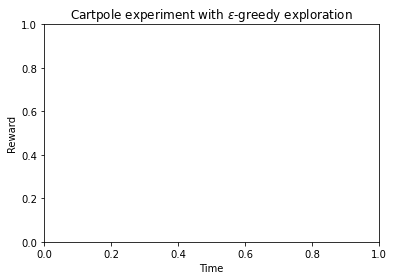

In [2]:
import numpy as np
import time
from Helper import LearningCurvePlot, smooth
from Assignment2_batch_updates import *

def average_over_repetitions(policy, epsilon, smoothing_window, plot, decay_epsilon, n_repetitions, n_runs, learning_rate,
                             gamma, batch_size, experience_replay):

    reward_results = np.empty([n_repetitions,n_runs]) # Result array
    now = time.time()
    
    for rep in range(n_repetitions): # Loop over repetitions
        rewards = cartpole(n_runs, learning_rate, gamma, policy, epsilon, experience_replay, batch_size, decay_epsilon)
        reward_results[rep] = rewards
        
    print('Running one setting takes {} minutes'.format((time.time()-now)/60))    
    learning_curve = np.mean(reward_results,axis=0) # average over repetitions
    learning_curve = smooth(learning_curve,smoothing_window) # additional smoothing
    return learning_curve  

def experiment():
    ####### Settings
    # Experiment    
    n_repetitions = 5
    smoothing_window = 1001
    n_runs = 65
    experience_replay = False
    gamma = 0.995

    # Exploration
    policy = 'egreedy' # 'egreedy' or other choices
    epsilon_min = 0.01
    decay_rate = 0.95
    batch_size = 64
    decay_epsilon = False
    
    # Learning rate
    learning_rate = 0.01
    
    # Plotting parameters
    plot = True
    
    # Nice labels for plotting
    policy_labels = {'egreedy': '$\epsilon$-greedy policy',
                  'softmax': 'Softmax policy'}                  #Something here might need to be changed

    
    ####### Experiments
    
    good_average_reward = 350 # We set this as a benchmark of good average reward reached by the algorithm
    
    Plot = LearningCurvePlot(title = 'Cartpole experiment with $\epsilon$-greedy exploration')    
    policy = 'egreedy'
    epsilons = [0.01, 1 ,0.2]
    for epsilon in epsilons:
        if epsilon == 1:
            decay_epsilon = True
        learning_curve = average_over_repetitions(policy, epsilon, smoothing_window, plot, decay_epsilon, 
                                                  n_repetitions, n_runs, learning_rate, gamma, batch_size, experience_replay)
        Plot.add_curve(learning_curve,label=r'$\epsilon$-greedy, $\epsilon $ = {}'.format(epsilon))
        decay_epsilon = False
    #policy = 'softmax'
    #temps = [0.01,0.1,1.0]
    #for temp in temps:
     #   learning_curve = average_over_repetitions(backup, n_repetitions, n_timesteps, max_episode_length, learning_rate, 
      #                                        gamma, policy, epsilon, temp, smoothing_window, plot, n)
       # Plot.add_curve(learning_curve,label=r'softmax, $ \tau $ = {}'.format(temp))
    Plot.add_hline(optimal_average_reward_per_timestep)
    Plot.save('cartpole_test.png')

if __name__ == '__main__':
    experiment()
